Proyecto 5: Introducci√≥n al an√°lisis frecuencial de se√±ales.

Valentina Garcia Obando C.C.1000539432

Juan Jos√© Alzate Molina C.C. 1007232151

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import ifft
import os
import glob
from google.colab import drive
import scipy.stats as stats
import scipy.io as sio
import pandas as pd
import scipy.signal as signal

***Compruebe que los valores de las primeras cinco muestras son los mismos***

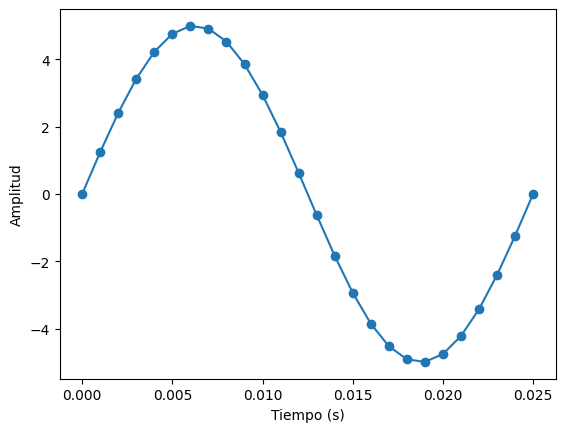

In [2]:
Fo = 40 # Frecuencia fundamental de la se√±al
Tp = 1/Fo # Periodo de la se√±al

Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la se√±al con duraci√≥n de Tp m√°s una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


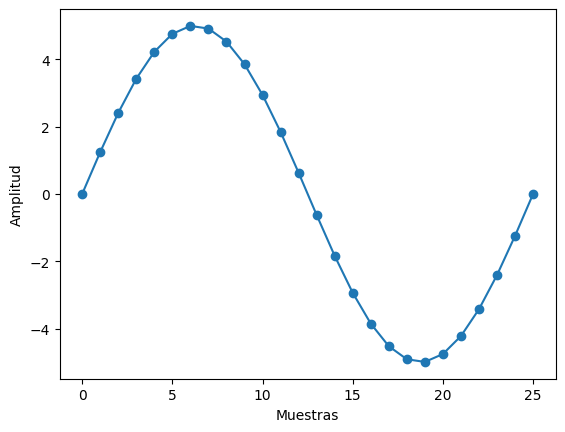

In [3]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

*A) Compruebe que los valores de las primeras cinco muestras son los mismos*


In [4]:
print("Valores de las primeras cinco muestras:")
print("x(t):", x[:5])
print("x1(n):", x1[:5])

Valores de las primeras cinco muestras:
x(t): [0.         1.24344944 2.40876837 3.42273553 4.22163963]
x1(n): [0.         1.24344944 2.40876837 3.42273553 4.22163963]


Se puede observar que los valores de las primeras 5 muestras son iguales a pesar de que la primera muestra es en el tiempo, y la segunda muestra es discreta, esto se da por el sobremuestreo el cual se elije una frecuencia de muestreo mayor a la de Nyquist, la cual dice que, la frecuencia de muestreo de Nyquist es la muestra m√≠nima que se debe tomar para la se√±al, sin embargo, cuando tomo una frecuencia m√°s alta de lo calculado anteriormente al cambiar una se√±al continua a discreta se da un sobremuestreo [1] que me permite que siga capturando suficiente de la se√±al original.

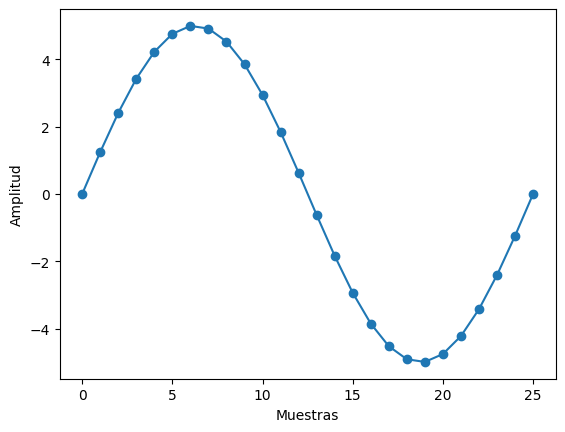

In [5]:
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

***Energ√≠a y potencia en el dominio del tiempo***

In [6]:
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)
print("energia10:", energia10)
print("potencia10:", potencia10)
print("rms10:", rms10)

energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
print("energia:", energia)
print("potencia:", potencia)
print("rms:", rms)

energia10: 3125.0000000000014
potencia10: 12.500000000000005
rms10: 3.535533905932738
energia: 312.50000000000006
potencia: 12.500000000000002
rms: 3.5355339059327378


*B) La potencia es la misma que en ùë•(ùëõ). ¬øPor qu√©?*

Se tiene que tanto la se√±al x como x10 comparten la misma forma de onda sinusoidal, diferenci√°ndose √∫nicamente por los ciclos de la se√±al. Al calcular la energ√≠a y dividirla por el n√∫mero total de puntos de la se√±al, obtenemos una estimaci√≥n de la potencia promedio de la se√±al.

Por lo tanto, la potencia es igual, debido a que est√°n basadas en la misma forma de onda y es una se√±al periodica, adem√°s solo difieren en los ciclos.

***Aplicaciones***

***Cree una se√±al que sea la suma de tres componentes sinusoidales con frecuencias de 40,
80 y 160 Hz. Defina la frecuencia de muestreo m√≠nima necesaria para representar la se√±al,
y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.***

In [7]:

f=[40,80,160]

x=max(f)
f_min=2*x
print('la frecuencia m√≠nima por Nyquist es:',f_min)

la frecuencia m√≠nima por Nyquist es: 320


La frecuencia de muestreo m√≠nima seg√∫n el teorema de Nyquist es de 320 Hz como se muestra, sin embargo, para una mejor visualizaci√≥n no tomamos la m√≠nima, sino una m√°s alta, en este caso se tomar√° una frecuencia diferente por cada gr√°fica para suavizar su visualizaci√≥n.

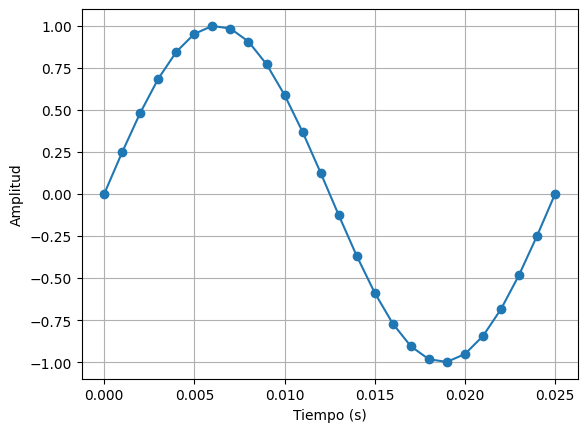

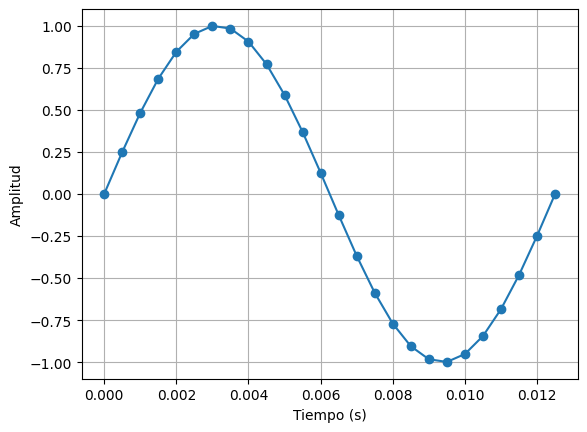

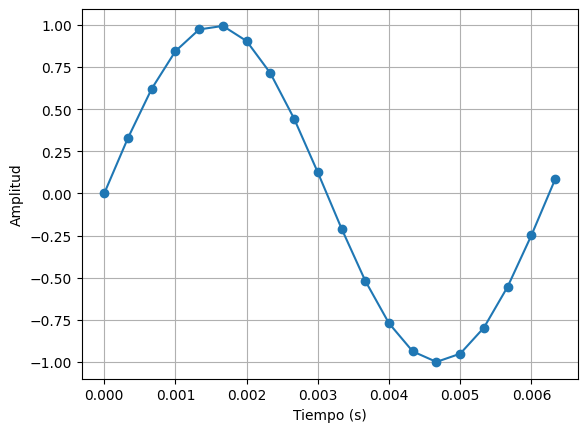

In [8]:

Fo = 40
Tp = 1/Fo
Fs = 1000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 1
x1 = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x1, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Fo = 80
Tp = 1/Fo
Fs = 2000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 1
x2 = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x2, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Fo = 160
Tp = 1/Fo
Fs = 3000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 1
Fo = 160
x3 = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x3, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Los periodos de muestreo son diferentes en las 3 gr√°ficas, ya que se busca mayor cantidad de muestras por unidad de tiempo para que la gr√°fica se suavice en el caso de frecuencias m√°s altas.

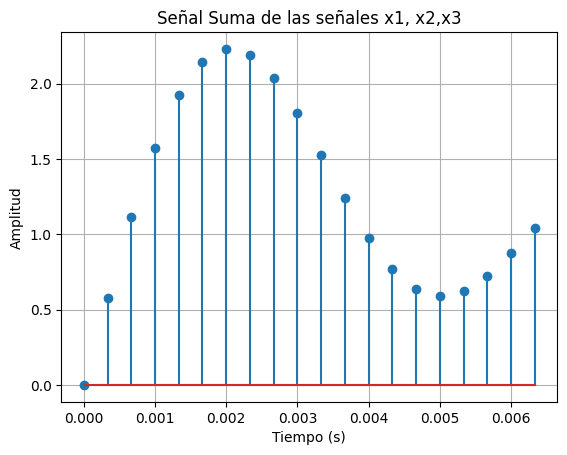

In [9]:
f = [40, 80, 160]

A = 1
x1 = A * np.sin(2 * np.pi * f[0] * t)
x2 = A * np.sin(2 * np.pi * f[1] * t)
x3 = A * np.sin(2 * np.pi * f[2] * t)

signal = x1 + x2 + x3

plt.stem(t, signal)
plt.title('Se√±al Suma de las se√±ales x1, x2,x3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


***Calcule la transformada de Fourier de la se√±al y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la se√±al (trabaje con 10 periodos
de la se√±al).***

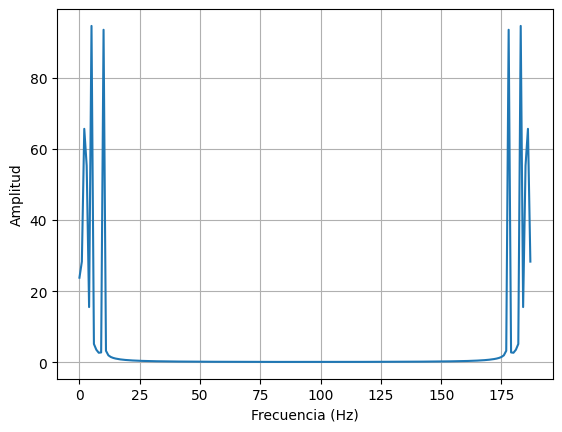

In [10]:
f = [40, 80, 160]
Tp = 10 / 160
Fs = 3000
T = 1 / Fs
t = np.arange(0, Tp, T)
A = 1
x1 = A * np.sin(2 * np.pi * f[0] * t)
x2 = A * np.sin(2 * np.pi * f[1] * t)
x3 = A * np.sin(2 * np.pi * f[2] * t)

signal10 = x1 + x2 + x3

f_signal = np.fft.fft(signal10)

plt.plot(abs(f_signal))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

***Consulte la funci√≥n que permite realizar el c√°lculo de la transformada inversa de Fourier.
Apl√≠quelo a la se√±al anterior.***

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


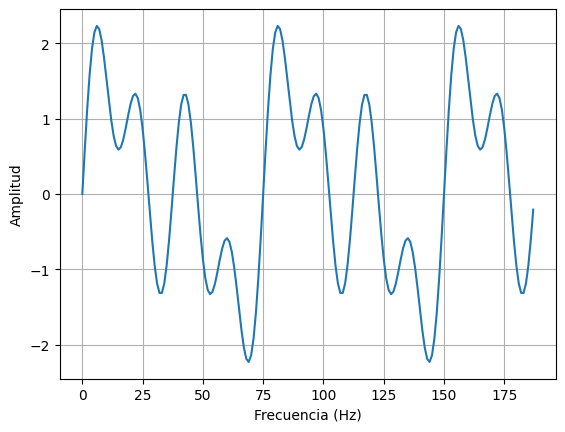

In [11]:

signal_reconstructed = np.fft.ifft(f_signal)
plt.plot(signal_reconstructed)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

.ifft(fft(a)): Esta funci√≥n calcula la inversa de la transformada de Fourier discreta unidimensional de n puntos calculada por fft. En otras palabras, con precisi√≥n num√©rica.[2]

***¬øPodr√≠a decir que las siguientes l√≠neas aplican un filtro? ¬øPor qu√©?***

<ipython-input-13-f3160da9f6b3>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13];#aplica un rango especifico de frecuencias descartando las dem√°s frecuencias


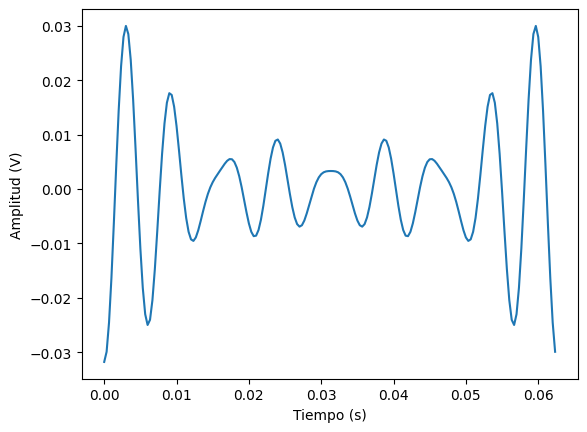

In [13]:
F1 = np.fft.fft(x1); #se le aplica la transformada de fourier para la se√±al x
F2 = np.zeros((len(F1)));# se crea un arreglo de ceros que sea igual al tama√±o de x
F2[9:13] = F1[9:13];#aplica un rango especifico de frecuencias descartando las dem√°s frecuencias
xr = np.fft.ifft(F2);#Se realiza la transformada inversa de Fourier de F2 utilizando la funci√≥n ifft del m√≥dulo numpy.fft, lo que nos devuelve la se√±al filtrada en el dominio del tiempo
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()# esta parte es para mostrar la se√±al filtrada.

Lo que se puede deducir del c√≥digo es que es un filtro pasa bandas, debido a que permite pasar ciertas frecuencias en un rango que ya se especifica en el c√≥digo, las dem√°s se√±ales se atenuan o se eliminan.

***El archivo adjunto (senecg.mat) contiene una se√±al de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un an√°lisis en frecuencia de la se√±al usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elim√≠nelo de la forma que se mostr√≥ antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la se√±al filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el ancho de la ventaja)***

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


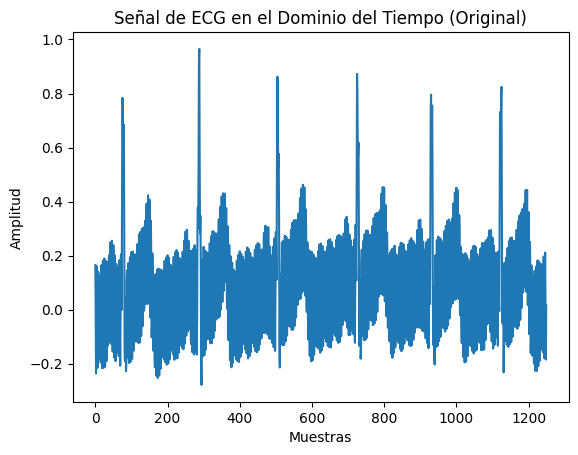

In [36]:
drive.mount('/content/drive')

# Cargar el archivo .mat
data = sio.loadmat('/content/drive/MyDrive/senecg.mat')
ecg_signal = data['ECG']  # Acceder a la se√±al de ECG utilizando la clave 'ECG'

# Definir la frecuencia de muestreo
fs = 250  # Frecuencia de muestreo en Hz


plt.figure()
plt.plot(ecg_signal)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Se√±al de ECG en el Dominio del Tiempo (Original)')
plt.show()


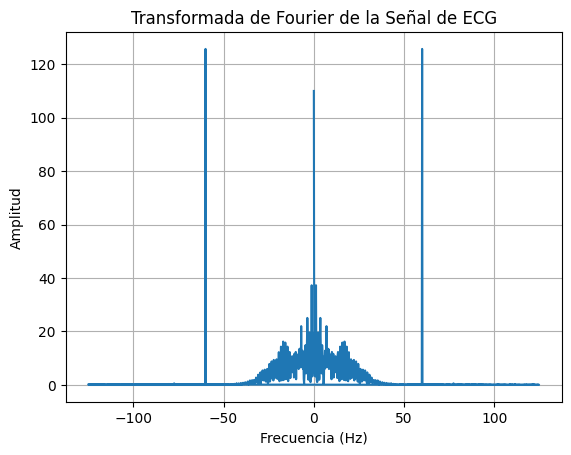

In [37]:
ecg_fourier = np.fft.fft(ecg_signal.flatten())
frequencies = np.fft.fftfreq(len(ecg_fourier), 1/fs)

plt.figure()
plt.plot(frequencies, np.abs(ecg_fourier))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de la Se√±al de ECG')
plt.grid(True)
plt.show()

(1250, 1)


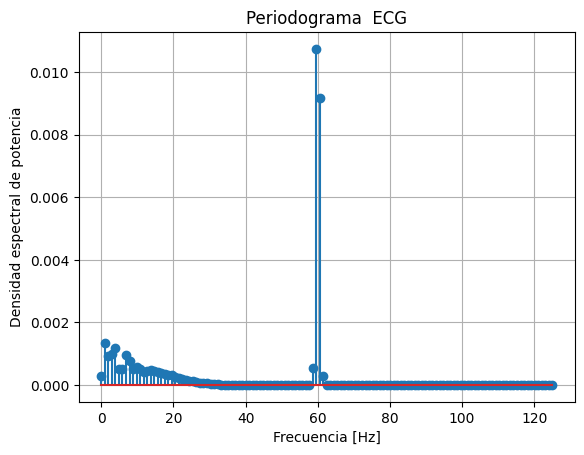

In [44]:
from scipy.signal import welch
nperseg = 256
noverlap = int(nperseg // 2)
print(ecg_signal.shape)

f, Pxx = welch(ecg_signal.ravel(), fs, 'hann', nperseg, noverlap)


plt.stem(f,Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma  ECG')
plt.grid()
plt.show()

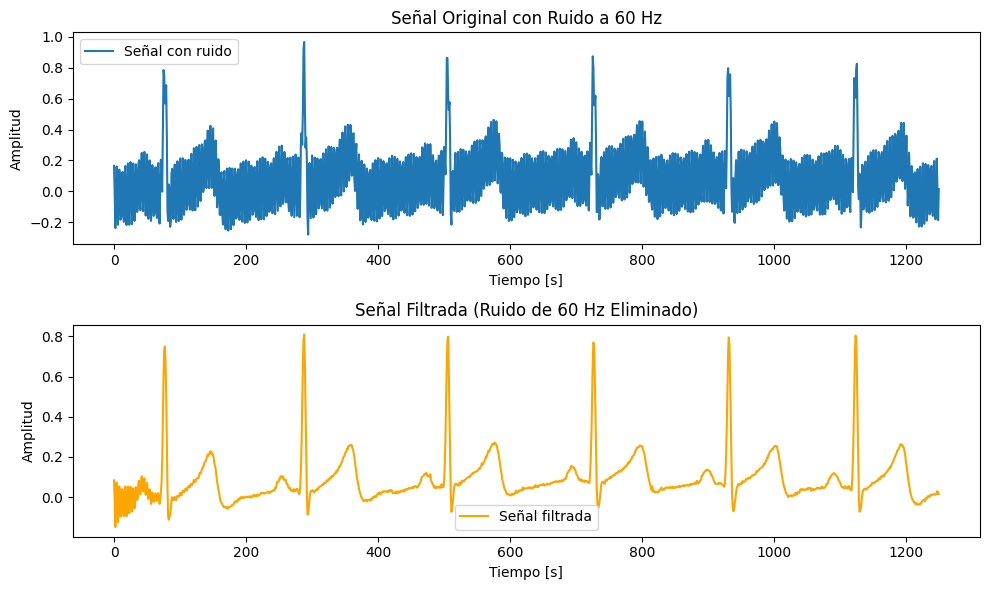

In [41]:
fs = 250  # Frecuencia de muestreo en Hz
f0 = 60    # Frecuencia del ruido en Hz que queremos filtrar
Q = 30     # Factor de calidad (ajusta el ancho de la banda de rechazo)

# Dise√±a el filtro Notch
b, a = signal.iirnotch(f0, Q, fs)

# Genera una se√±al de ejemplo con ruido de 60 Hz
signal_original = ecg_signal.ravel()

# Aplica el filtro Notch
signal_filtrada = signal.filtfilt(b, a, signal_original)

# Grafica la se√±al original y la se√±al filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal_original, label="Se√±al con ruido")
plt.title("Se√±al Original con Ruido a 60 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(signal_filtrada, label="Se√±al filtrada", color='orange')
plt.title("Se√±al Filtrada (Ruido de 60 Hz Eliminado)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()

plt.tight_layout()
plt.show()

(1250, 1)


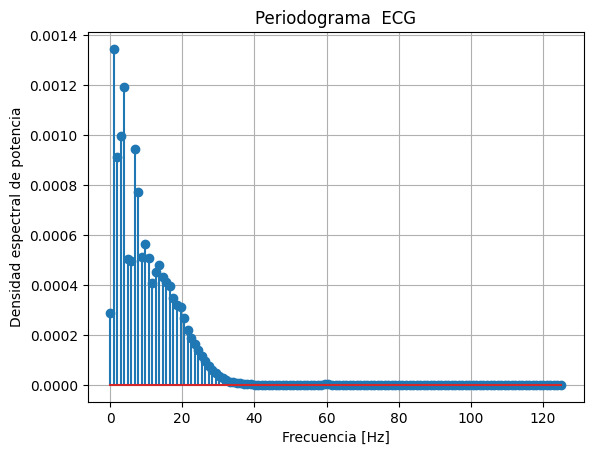

In [43]:
from scipy.signal import welch
nperseg = 256
noverlap = int(nperseg // 2)
print(ecg_signal.shape)

f, Pxx = welch(signal_filtrada, fs, 'hann', nperseg, noverlap)


plt.stem(f,Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma  ECG')
plt.grid()
plt.show()


Para realizar el m√©todo de Welch en la se√±al ECG se utiliza una ventana Hanning la cual se le suele denominar tambi√©n ventana de coseno elevado.Esta ventana suaviza los extremos a cero y mejora su resoluci√≥n en frecuencia.[3] El tama√±o de la ventana se escogio de 256 esto porque queremos una ventana lo suficientemente ancha para poder distinguir las variaciones, sin embargo no debe ser demasiado ancha ya que esto puede generar una mal resoluci√≥n temporal de la se√±al, por lo tanto es lo suficientemente grande para observar los datos sin verlos comprometidos.

El solapamiento se elije del 50% que significa que cada segmento se siperpone con el anterior en la mitad para poder observar el espectro de mejor forma al aumentar la cantidad de muestras para el promedio.

Se evidencia que la frecuencia predominante est√° a 60 Hz lo cual corresponde al ruido de la red electrica, se hace uso de un filtro iirnotch para eliminar el ruido y poder apreciar el periodograma de Welch con las frecuencias naturales de la se√±al predominando en la densidad de energ√≠a.

***Realice un an√°lisis de frecuencia a trav√©s del periodograma de welch de una se√±al de EEG
de un paciente Sano y otra de un paciente con Parkinson de alg√∫n canal que en el proyecto
1 hayan identificado que presentaba diferencias, si no encontr√≥ diferencias, elija un par al
azar. Realice un an√°lisis comparativo de las se√±ales seg√∫n lo que le indiquen los
periodogramas. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el
ancho de la ventaja)***

In [17]:
names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']
Control=pd.read_csv('/content/drive/MyDrive/Proyecto1_Biosenales/Datos_Marcha/Control/control8.ts',delimiter='\t',names=names)
Parkinson=datos = pd.read_csv('/content/drive/MyDrive/Proyecto1_Biosenales/Datos_Marcha/Parkinson/park8.ts',delimiter='\t',names=names)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
tiempo = datos['Elapsed Time (sec)'].values
left_int_control=Control['Left Stride Interval (sec)'].values
left_int_park=Parkinson['Left Stride Interval (sec)'].values



In [25]:
fs = 1 / np.mean(np.diff(tiempo))
print(fs)
print(left_int_control.shape)

0.7302349440556887
(261,)


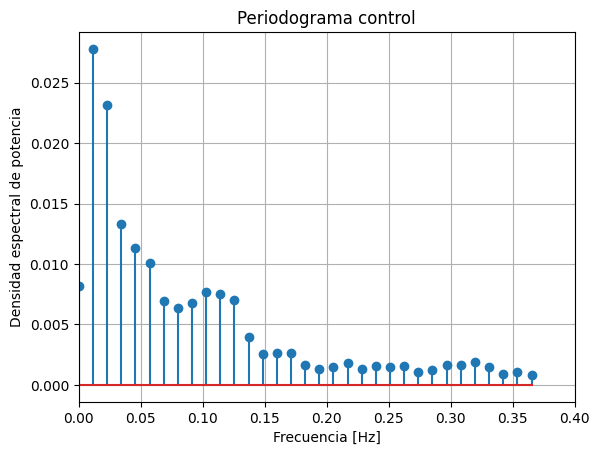

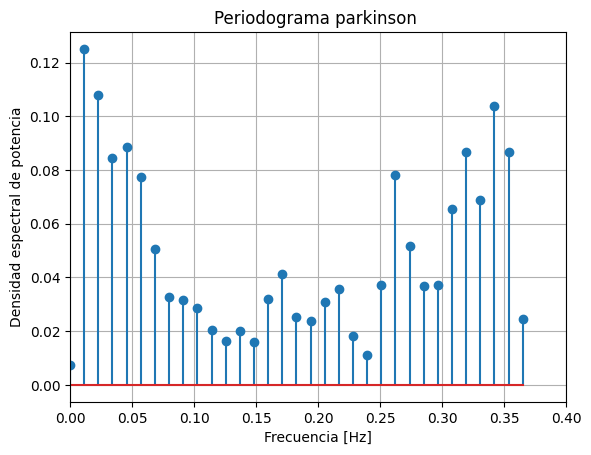

In [33]:
import matplotlib.pyplot as plt
from scipy.signal import welch

nperseg = 64
noverlap = int(nperseg / 2)

f_sano, P_control = welch(left_int_control.ravel(), fs, 'hann', nperseg, noverlap)

plt.stem(f_sano, P_control)
plt.xlim([0, 0.4])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma control')
plt.grid()
plt.show()

f_parkinson, P_parkinson = welch(left_int_park.ravel(), fs, 'hann', nperseg, noverlap)

plt.stem(f_parkinson, P_parkinson)
plt.xlim([0, 0.4])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma parkinson ')
plt.grid()
plt.show()

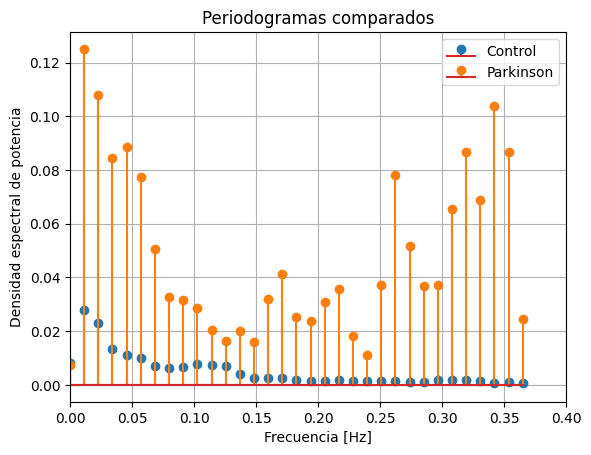

In [34]:
plt.stem(f_sano, P_control, label='Control')

plt.stem(f_parkinson, P_parkinson, linefmt='C1-', markerfmt='C1o', label='Parkinson')

plt.xlim([0, 0.4])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodogramas comparados')
plt.grid(True)
plt.legend()
plt.show()



En este caso el an√°lisis se realiza no en se√±ales de ECG, sino en se√±ales de patr√≥n de marcha. Fueron tomados 2 sujetos al azar entre los grupos de control y parkinson, y se utilizaron las se√±ales de intervalo izquierdo (las cuales presentaron varianza significativa en los an√°lisis hechos en el proyecto 1).

Se utilizo un ancho de ventana mucho m√°s bajo y un solapamiento igual al que se viene utilizando de un 50% debido a lo bajas que son las frecuencias determinantes para estas se√±ales en comparaci√≥n a una se√±al de ECG. Con una ventana m√°s amplia y mayor solapamiento se obtienen demasiados puntos en rangos de frecuencia muy peque√±os.

Se puede observar un comportamiento muy distinto en el periodograma de ambos sujetos. Adem√°s de la evidente diferencia en la amplitud de la densidad de potencia, se evidencia que parea el paciente control las frecuencias iniciales contienen la mayor parte de la energ√≠a y sucede un decrecimiento, por el contrario en el caso del paciente con Parkinson podemos apreciar una forma concava con alta energ√≠a en las frecuencias iniciales pero tambi√©n en las finales acercandose a 0.4 Hz

***Conclusiones***

Aplicar el m√©todo de Welch a la se√±al nos sirve para suavizar los segmentos y reducir los artefactos que se puedan dar por discontinuidad de la se√±al, por otro lado, nos permite obsercar como cambia la potencia de la se√±al a lo largo del tiempo, es decir, con este m√©todo obtenemos una versi√≥n m√°s detallada de como varia la potencia de la se√±al en el tiempo, permitiendonos un mejor an√°lisis espectral.

En cuanto a la transformada de fourier se puede observar que al pasar la se√±al al dominio de la frecuencia se puede eliminar o atenuar ruidos por medio de filtrados, proporciona informaci√≥n sobre la distribuci√≥n de frecuencias en la se√±al. Por otro lado La Transformada Inversa de Fourier es el proceso inverso de la Transformada de Fourier. Mientras que la transformada de fourier toma una se√±al en el dominio del tiempo y la descompone en sus componentes de frecuencia, la transformada inversa de fourier toma una se√±al en el dominio de la frecuencia y la reconstruye en el dominio del tiempo.

***Referencias***

[1] Jacobus Manfred Fecht, E.-C. (s.f.). Teorema del muestreo, y transformadas de Fourier continua y discreta, con aplicaciones. webs.um.es. https://webs.um.es/gustavo.garrigos/tfg/Fecht_julio2018.pdf

[2]numpy.fft.ifft ‚Äî NumPy v1.26 Manual. (s.f.). NumPy -. https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html

[3]GT, F. (s.f.). Ventanas de Hamming | PDF | Transformada r√°pida de Fourier | √Åreas de inform√°tica. Scribd. https://es.scribd.com/document/358481883/Ventanas-de-Hamming